## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

- Провести разведочный анализ данных, посмотреть на датасет, есть ли пропуски - посмотреть на зависимости признаков
- Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import date
import plotly.express as px

In [28]:
df = pd.read_csv('./clients.csv')
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,195.0,2591.425641,1244.617996,1002.00,2003.50,2054.00,3048.50,5051.0
Building,195.0,2.564103,1.243434,1.00,2.00,2.00,3.00,5.0
Year of sale,195.0,2006.333333,1.072941,2004.00,2006.00,2007.00,2007.00,2010.0
Month of sale,195.0,7.271795,3.378674,1.00,4.00,8.00,10.00,12.0
Property number,195.0,27.328205,14.830832,1.00,15.00,27.00,39.00,59.0
Area (ft.),195.0,899.867128,261.489550,410.71,739.86,785.48,1075.46,1942.5
Age at time of purchase,178.0,46.151685,12.841692,19.00,37.00,45.00,55.00,76.0
Y,178.0,1960.325843,12.835575,1931.00,1950.25,1962.00,1969.75,1986.0
M,178.0,6.752809,3.450312,1.00,4.00,6.00,9.75,15.0
D,178.0,15.449438,8.457285,1.00,8.00,15.00,23.75,31.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [32]:
!pip install missingno

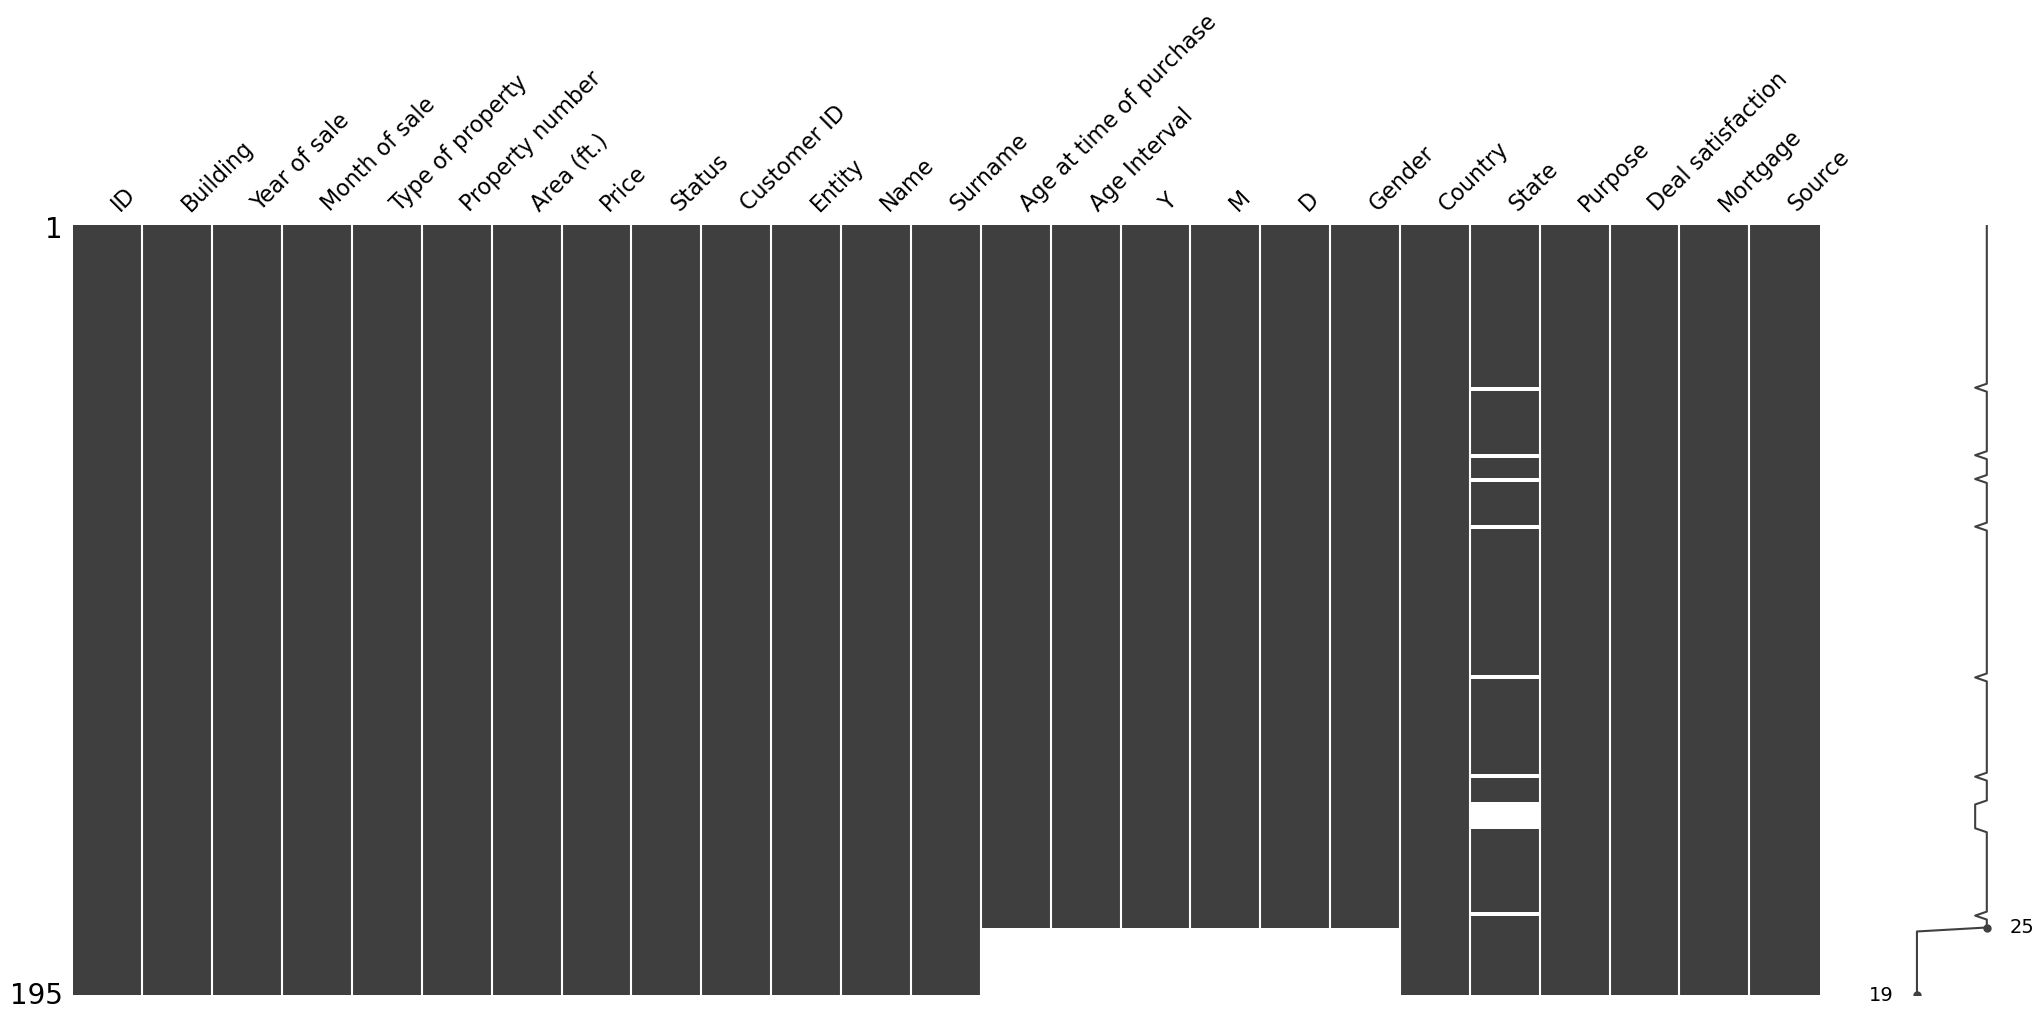

<Figure size 1500x900 with 0 Axes>

In [33]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

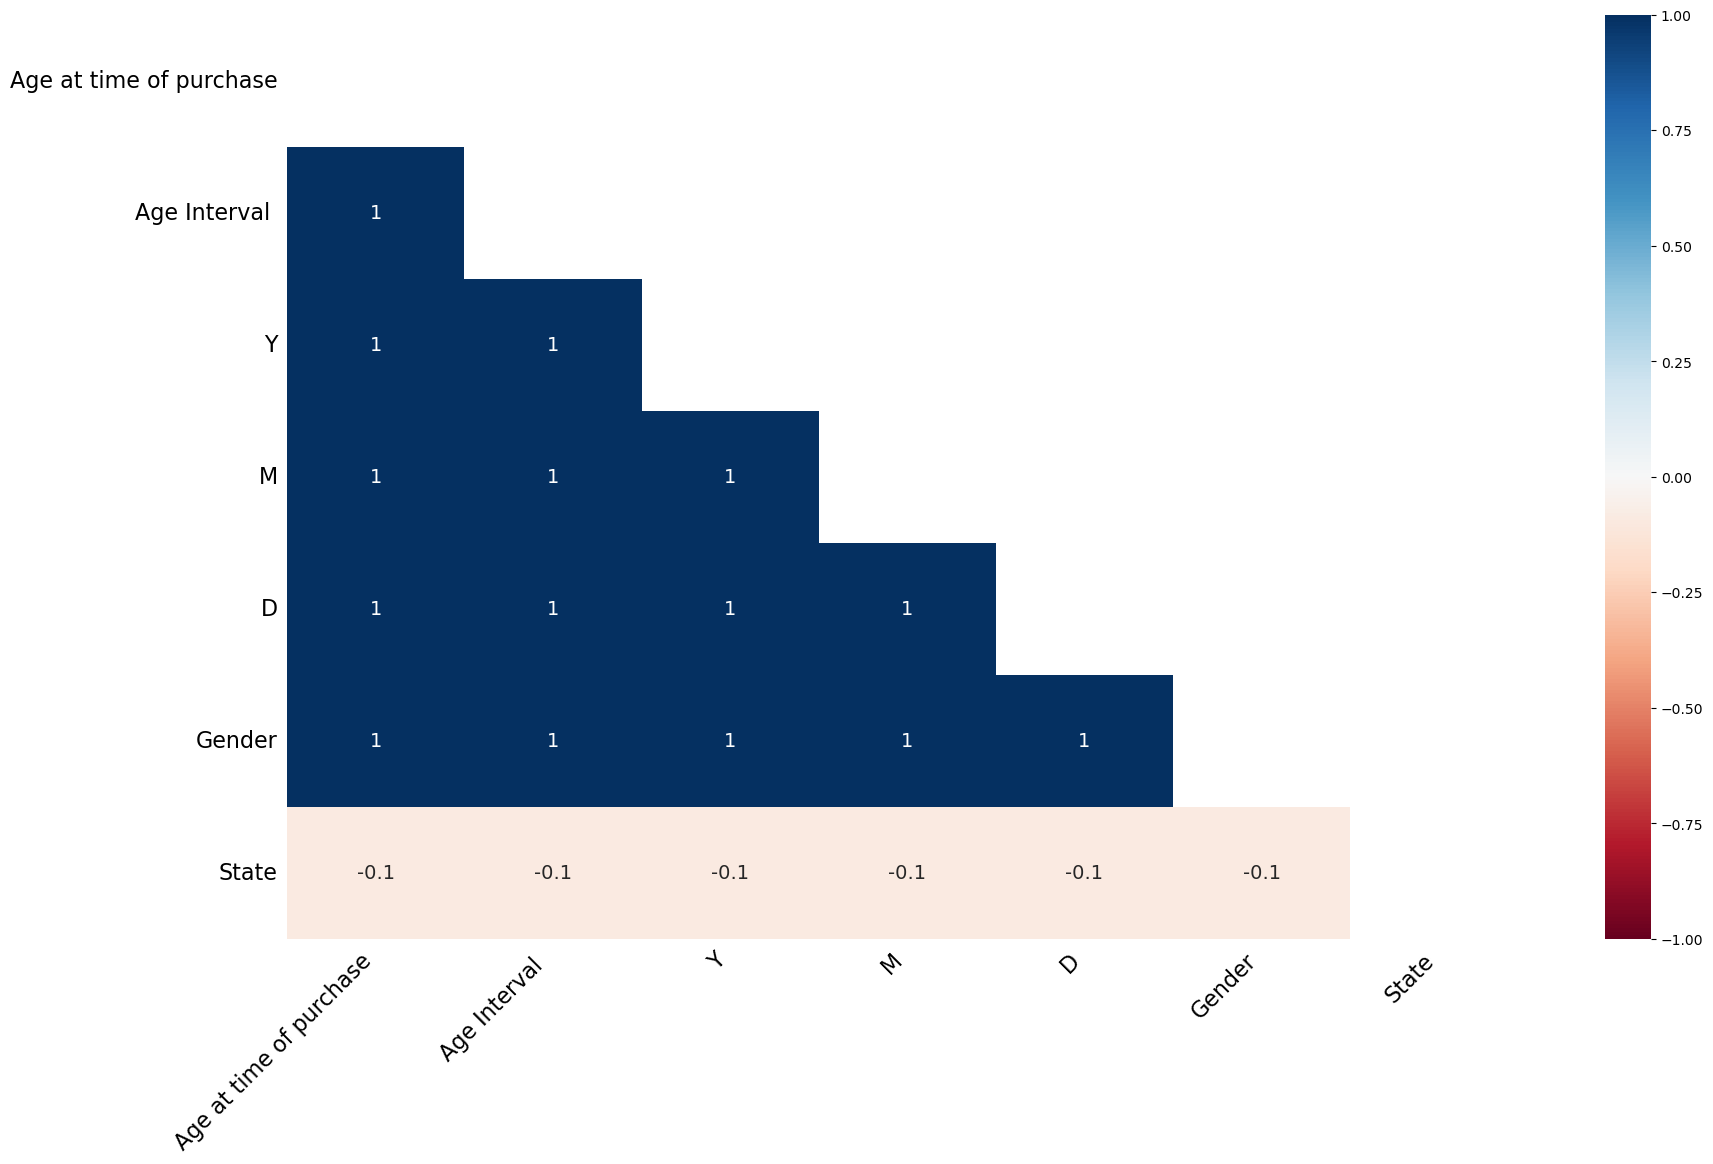

In [34]:
msno.heatmap(df, labels = True)

In [35]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [36]:
missing_percent = get_numerical_summary(df)

Age at time of purchase : 17 (8.718%)
Age Interval  : 17 (8.718%)
Y : 17 (8.718%)
M : 17 (8.718%)
D : 17 (8.718%)
Gender : 17 (8.718%)
State : 14 (7.179%)


In [37]:
#count the number of missing values
df.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

In [59]:
#gender proportion of unique clients
gender = df.drop_duplicates('Customer ID').Gender.value_counts(normalize=True)
gender

Gender
M    0.56129
F    0.43871
Name: proportion, dtype: float64

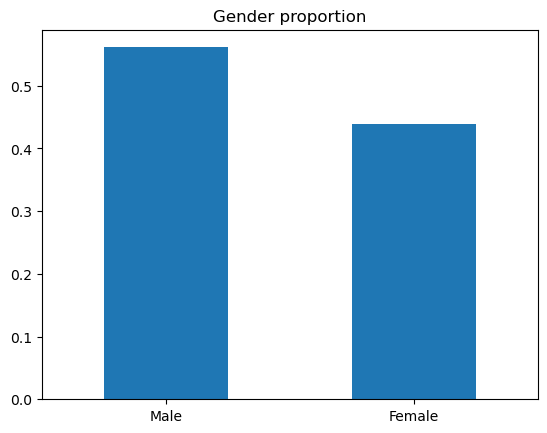

In [39]:
new_index_names = ['Male', 'Female']
gender.index = new_index_names
gender.plot(title='Gender proportion', kind='bar', rot=0)
plt.show()

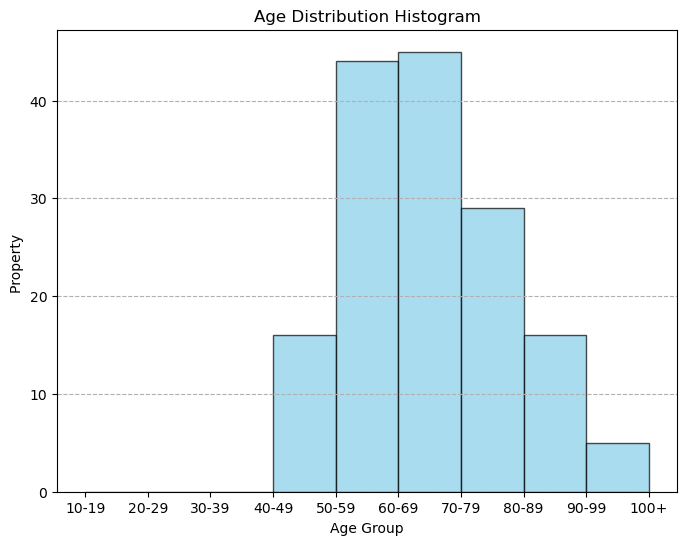

In [73]:
#Age distribution of clients
current_year = date.today().year
df['age'] = current_year - df['Y']
bins = range(10, 101, 10)
plt.figure(figsize=(8, 6))
plt.hist(df.drop_duplicates('Customer ID')['age'], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Property ')
plt.title('Age Distribution Histogram')
plt.xticks(bins, [f'{b}-{bins[i+1]-1}' for i, b in enumerate(bins[:-1])] + ['100+'])
plt.grid(axis='y', linestyle='--')
plt.show()

In [41]:
df['Type of property'].value_counts(normalize= True)

Type of property
Apartment    0.964103
Office       0.035897
Name: proportion, dtype: float64

In [62]:
gp = df.groupby(['Gender'])['Type of property'].value_counts()
gp

Gender  Type of property
F       Apartment            70
M       Apartment           106
        Office                2
Name: count, dtype: int64

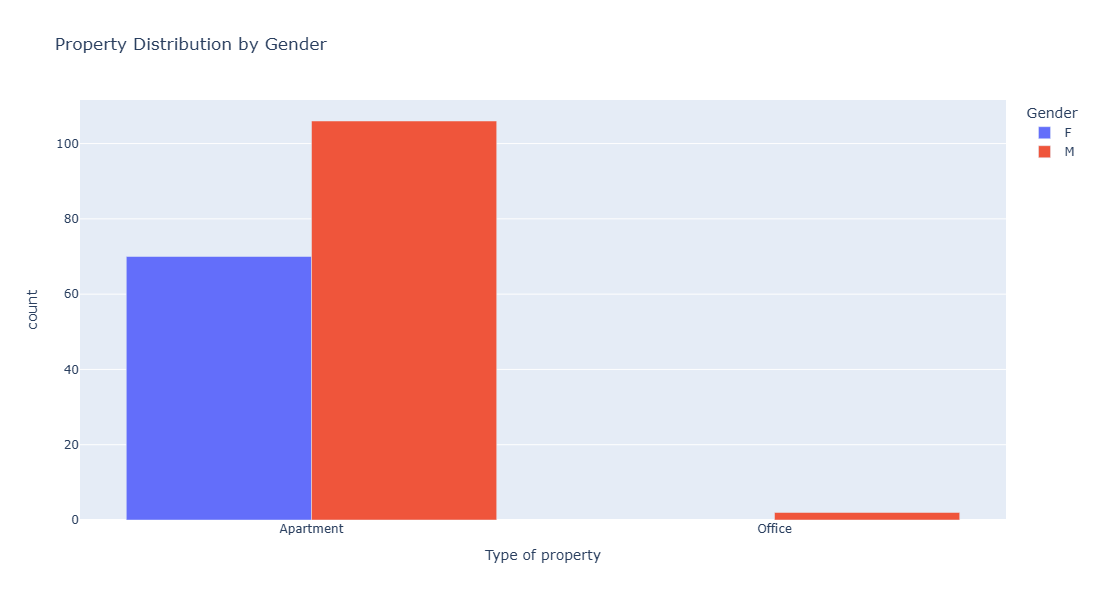

In [63]:
df_plot = gp.reset_index()
fig = px.bar( df_plot, x='Type of property', y='count', color='Gender', barmode='group', title='Property Distribution by Gender', width=600, 
    height=600
)
fig.show()

In [44]:
df.State.value_counts(normalize=True)

State
California    0.657459
Nevada        0.093923
Arizona       0.060773
Oregon        0.060773
Colorado      0.060773
Utah          0.033149
Virginia      0.022099
Kansas        0.005525
Wyoming       0.005525
Name: proportion, dtype: float64

In [45]:
counts = df.State.value_counts()
states = counts.index.tolist()
states_values = counts.values.tolist()


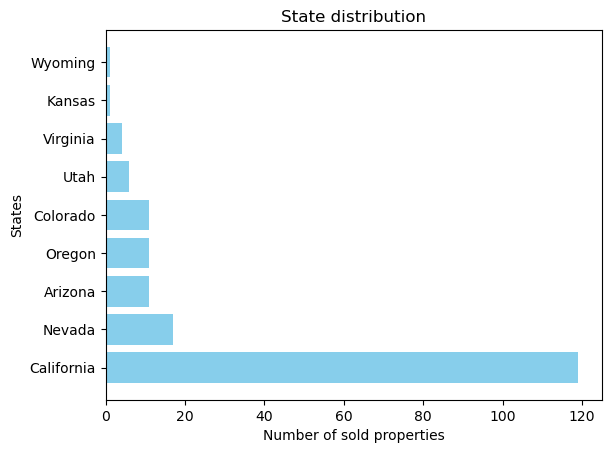

In [46]:
plt.barh(states, states_values, color='skyblue')
plt.xlabel('Number of sold properties')
plt.ylabel('States')
plt.title('State distribution')
plt.show()

In [47]:
purpose = df.Purpose.value_counts(normalize=True)
purpose

Purpose
Home          0.610256
Investment    0.389744
Name: proportion, dtype: float64

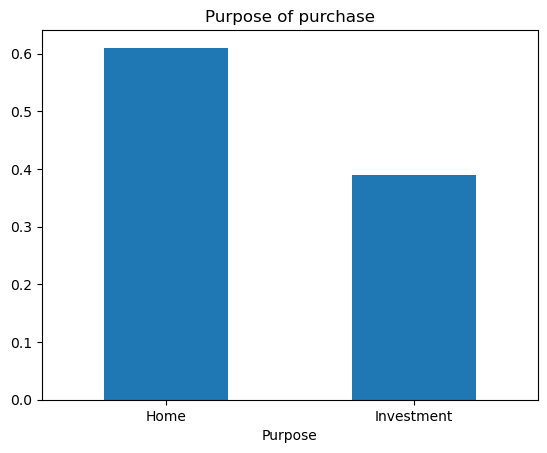

In [64]:
purpose.plot(kind='bar', rot=0)
plt.title("Purpose of purchase")
plt.show()


In [49]:
source = df.drop_duplicates('Customer ID').Source.value_counts()
source

Source
Website    93
Agency     54
Client     15
Name: count, dtype: int64

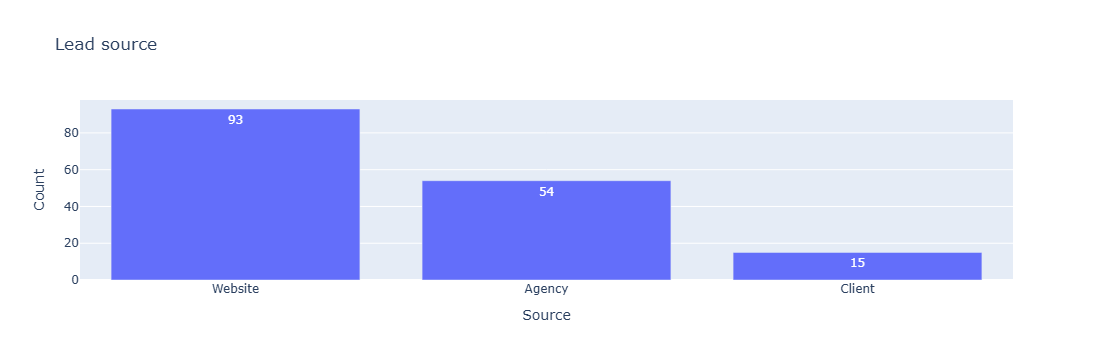

In [50]:
counts_df = df.drop_duplicates('Customer ID')['Source'].value_counts().reset_index()
counts_df.columns = ['Source', 'Count']
fig = px.bar(counts_df, x='Source', y='Count', text_auto=True, title="Lead source")
fig.show()

In [51]:
df['Price_float'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

In [52]:
df['Price_float'].describe()

count       195.000000
mean     269434.560923
std       80129.094465
min      117564.070000
25%      212393.250000
50%      243052.590000
75%      308550.875000
max      529317.280000
Name: Price_float, dtype: float64

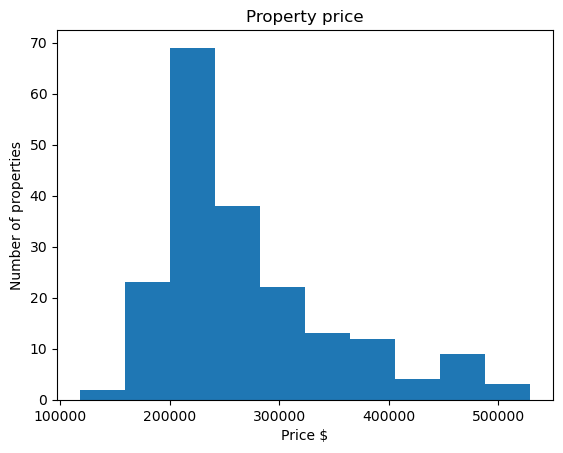

In [53]:
df['Price_float'].plot.hist()
plt.title("Property price")
plt.xlabel("Price $")
plt.ylabel("Number of properties")
plt.show()

In [54]:
df['Area_meters'] = df['Area (ft.)'] * 0.092903

In [55]:
df['Area_meters'].describe()

count    195.000000
mean      83.600356
std       24.293164
min       38.156191
25%       68.735214
50%       72.973448
75%       99.913460
max      180.464078
Name: Area_meters, dtype: float64

In [56]:
df['price_per_meter'] = df['Price_float'] / df['Area_meters']
df['price_per_meter'].describe()

count     195.000000
mean     3228.278813
std       307.210038
min      2632.357989
25%      2974.647679
50%      3244.136529
75%      3449.498527
max      4463.749818
Name: price_per_meter, dtype: float64

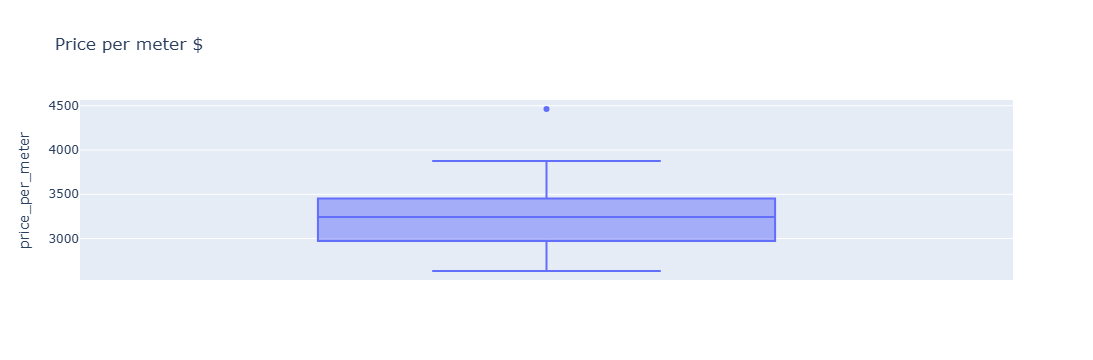

In [57]:
price = df['price_per_meter'] 
fig = px.box(price, y="price_per_meter", title= "Price per meter $")
fig.show()

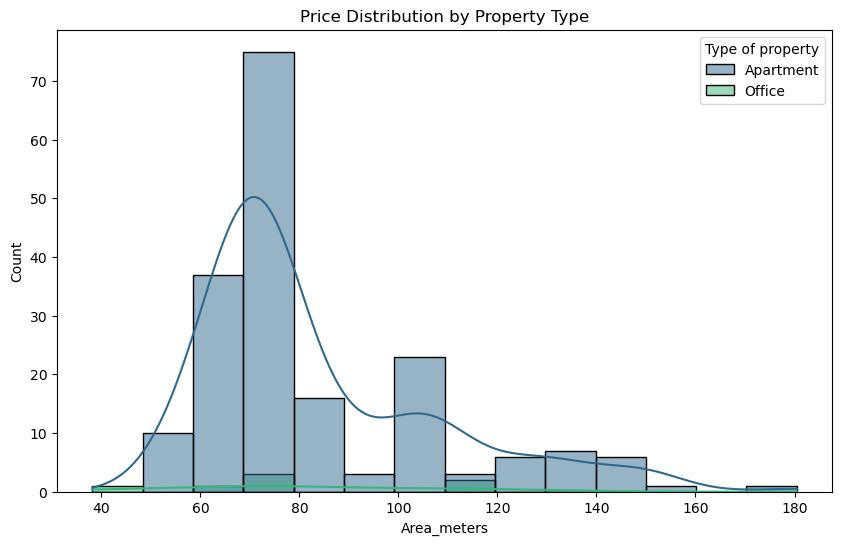

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot( data=df, x='Area_meters', hue='Type of property', kde=True, element="bars", palette="viridis", alpha=0.5)
plt.title('Price Distribution by Property Type')
plt.show()